In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

import warnings
warnings.filterwarnings("ignore")

# Load cleaned data
data = pd.read_csv("/content/drive/MyDrive/cleaned_data..csv")
print("Data shape:", data.shape)

# Quick look
display(data.head(6))
display(data.isnull().sum())


Data shape: (1227086, 22)


,AMT_CREDIT_x,AMT_GOODS_PRICE_x,CNT_CHILDREN,CNT_FAM_MEMBERS,AMT_ANNUITY_x,DAYS_BIRTH,DAYS_EMPLOYED,REGION_POPULATION_RELATIVE,REGION_RATING_CLIENT,AMT_INCOME_TOTAL,...,HOUR_APPR_PROCESS_START_x,ORGANIZATION_TYPE,NAME_INCOME_TYPE,OCCUPATION_TYPE,NAME_CONTRACT_STATUS,CODE_GENDER,NAME_EDUCATION_TYPE,NAME_FAMILY_STATUS,NAME_CONTRACT_TYPE_x,TARGET
0,406597.5,351000.0,0,1.0,24700.5,-9461,-637.0,0.018801,2,202500.0,...,10,Business Entity Type 3,Working,Laborers,Approved,M,Secondary / secondary special,Single / not married,Cash loans,1
1,1293502.5,1129500.0,0,2.0,35698.5,-16765,-1188.0,0.003541,1,270000.0,...,11,School,State servant,Core staff,Approved,F,Higher education,Married,Cash loans,0
2,1293502.5,1129500.0,0,2.0,35698.5,-16765,-1188.0,0.003541,1,270000.0,...,11,School,State servant,Core staff,Approved,F,Higher education,Married,Cash loans,0
3,1293502.5,1129500.0,0,2.0,35698.5,-16765,-1188.0,0.003541,1,270000.0,...,11,School,State servant,Core staff,Approved,F,Higher education,Married,Cash loans,0
4,135000.0,135000.0,0,1.0,6750.0,-19046,-225.0,0.010032,2,67500.0,...,9,Government,Working,Laborers,Approved,M,Secondary / secondary special,Single / not married,Revolving loans,0
5,312682.5,297000.0,0,2.0,29686.5,-19005,-3039.0,0.008019,2,135000.0,...,17,Business Entity Type 3,Working,Laborers,Approved,F,Secondary / secondary special,Civil marriage,Cash loans,0


,0
AMT_CREDIT_x,0
AMT_GOODS_PRICE_x,0
CNT_CHILDREN,0
CNT_FAM_MEMBERS,0
AMT_ANNUITY_x,0
DAYS_BIRTH,0
DAYS_EMPLOYED,0
REGION_POPULATION_RELATIVE,0
REGION_RATING_CLIENT,0
AMT_INCOME_TOTAL,0


In [3]:
# Assuming 'data' is already loaded
data = (
    data
    .assign(
        # Age in years (since DAYS_BIRTH is negative)
        AGE=lambda x: (-x['DAYS_BIRTH'] / 365).round(1),

        # Employment duration (DAYS_EMPLOYED is negative, clip extreme values)
        YEARS_EMPLOYED=lambda x: (
            -pd.to_numeric(x['DAYS_EMPLOYED'], errors='coerce').clip(upper=365 * 100) / 365
        ).round(1),

        # Extract birth year (relative, not exact real year)
        BIRTH_YEAR=lambda x: (2025 - (-x['DAYS_BIRTH'] / 365).round(0)).astype(int),

        # Employment start year (approximate, relative to current year)
        EMPLOYMENT_START_YEAR=lambda x: (2025 - (-pd.to_numeric(x['DAYS_EMPLOYED'], errors='coerce') / 365).round(0)).astype(int)
    )
)

print(data[['AGE', 'YEARS_EMPLOYED', 'BIRTH_YEAR', 'EMPLOYMENT_START_YEAR']].head())


    AGE  YEARS_EMPLOYED  BIRTH_YEAR  EMPLOYMENT_START_YEAR
0  25.9             1.7        1999                   2023
1  45.9             3.3        1979                   2022
2  45.9             3.3        1979                   2022
3  45.9             3.3        1979                   2022
4  52.2             0.6        1973                   2024


In [4]:
data['EMPLOYMENT_START_YEAR'].value_counts()


,count
EMPLOYMENT_START_YEAR,
2020,309496
2024,122413
2023,114367
2022,107551
2021,91402
2019,64326
2018,60685
2017,54697
2016,43262


In [5]:
data.shape

(1227086, 26)

In [6]:
data.head()

,AMT_CREDIT_x,AMT_GOODS_PRICE_x,CNT_CHILDREN,CNT_FAM_MEMBERS,AMT_ANNUITY_x,DAYS_BIRTH,DAYS_EMPLOYED,REGION_POPULATION_RELATIVE,REGION_RATING_CLIENT,AMT_INCOME_TOTAL,...,NAME_CONTRACT_STATUS,CODE_GENDER,NAME_EDUCATION_TYPE,NAME_FAMILY_STATUS,NAME_CONTRACT_TYPE_x,TARGET,AGE,YEARS_EMPLOYED,BIRTH_YEAR,EMPLOYMENT_START_YEAR
0,406597.5,351000.0,0,1.0,24700.5,-9461,-637.0,0.018801,2,202500.0,...,Approved,M,Secondary / secondary special,Single / not married,Cash loans,1,25.9,1.7,1999,2023
1,1293502.5,1129500.0,0,2.0,35698.5,-16765,-1188.0,0.003541,1,270000.0,...,Approved,F,Higher education,Married,Cash loans,0,45.9,3.3,1979,2022
2,1293502.5,1129500.0,0,2.0,35698.5,-16765,-1188.0,0.003541,1,270000.0,...,Approved,F,Higher education,Married,Cash loans,0,45.9,3.3,1979,2022
3,1293502.5,1129500.0,0,2.0,35698.5,-16765,-1188.0,0.003541,1,270000.0,...,Approved,F,Higher education,Married,Cash loans,0,45.9,3.3,1979,2022
4,135000.0,135000.0,0,1.0,6750.0,-19046,-225.0,0.010032,2,67500.0,...,Approved,M,Secondary / secondary special,Single / not married,Revolving loans,0,52.2,0.6,1973,2024


In [7]:
data.columns

Index(['AMT_CREDIT_x', 'AMT_GOODS_PRICE_x', 'CNT_CHILDREN', 'CNT_FAM_MEMBERS',
       'AMT_ANNUITY_x', 'DAYS_BIRTH', 'DAYS_EMPLOYED',
       'REGION_POPULATION_RELATIVE', 'REGION_RATING_CLIENT',
       'AMT_INCOME_TOTAL', 'EXT_SOURCE_2', 'EXT_SOURCE_3',
       'HOUR_APPR_PROCESS_START_x', 'ORGANIZATION_TYPE', 'NAME_INCOME_TYPE',
       'OCCUPATION_TYPE', 'NAME_CONTRACT_STATUS', 'CODE_GENDER',
       'NAME_EDUCATION_TYPE', 'NAME_FAMILY_STATUS', 'NAME_CONTRACT_TYPE_x',
       'TARGET', 'AGE', 'YEARS_EMPLOYED', 'BIRTH_YEAR',
       'EMPLOYMENT_START_YEAR'],
      dtype='object')

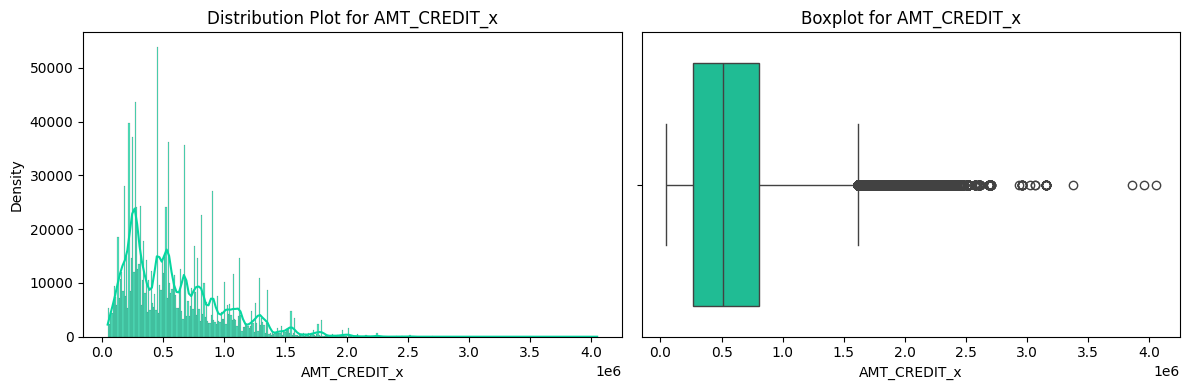

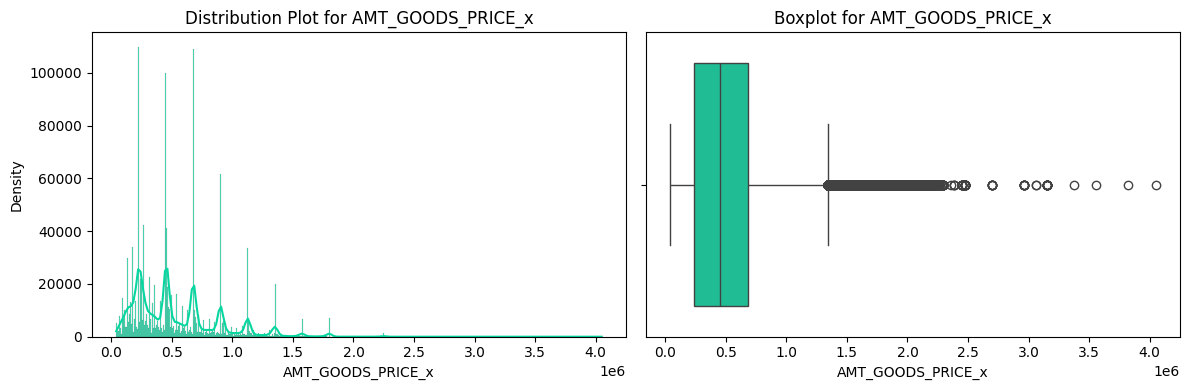

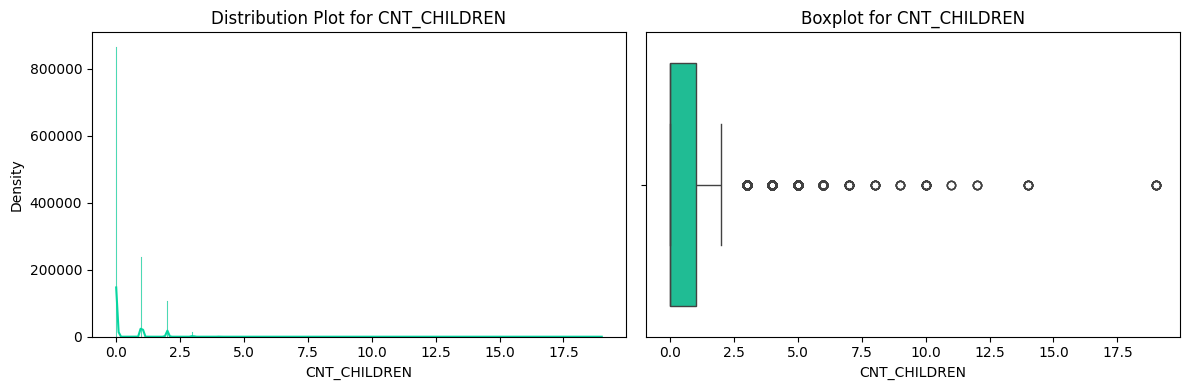

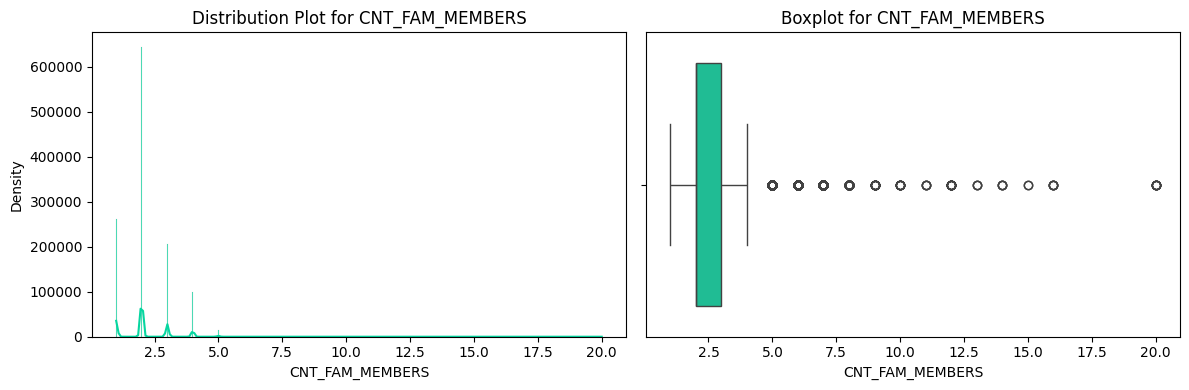

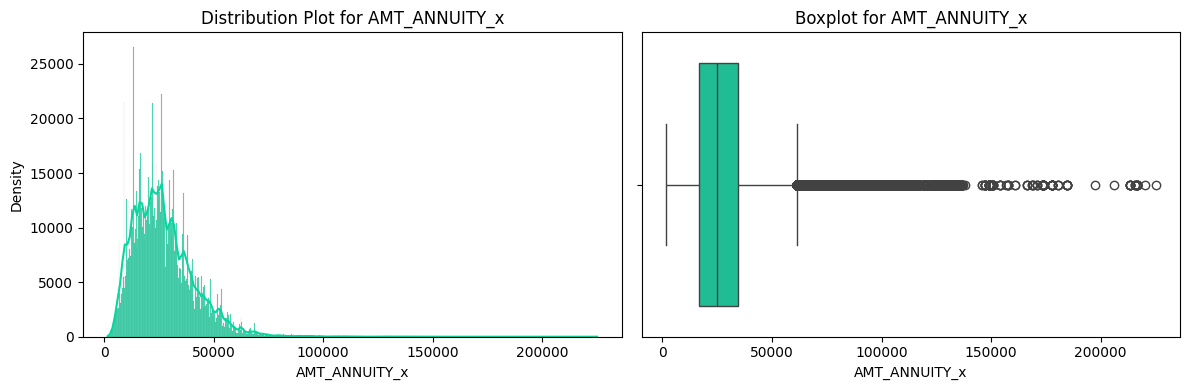

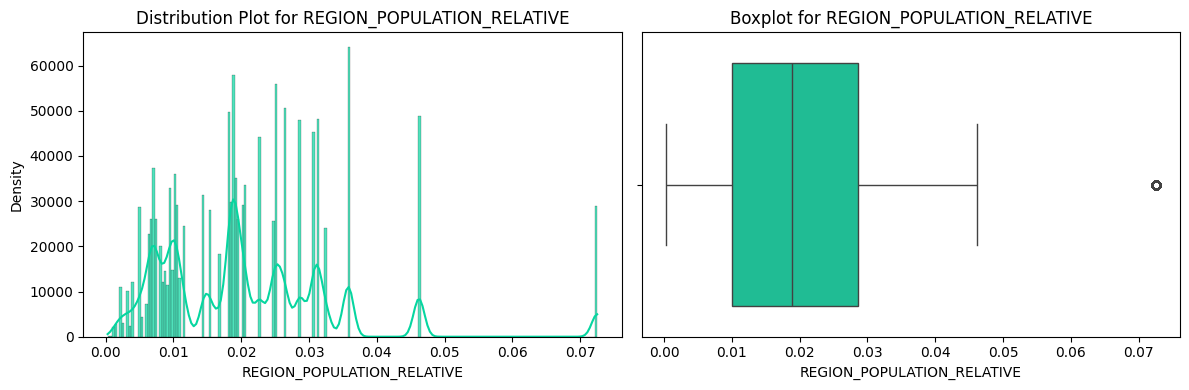

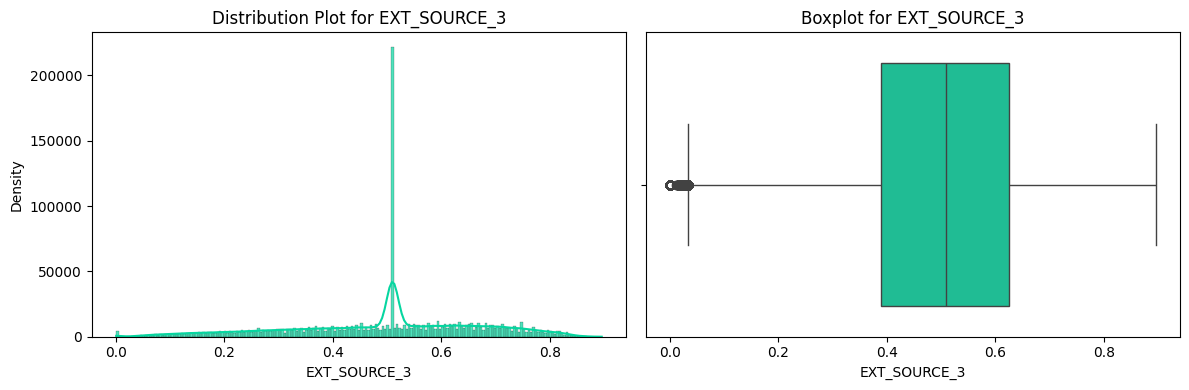

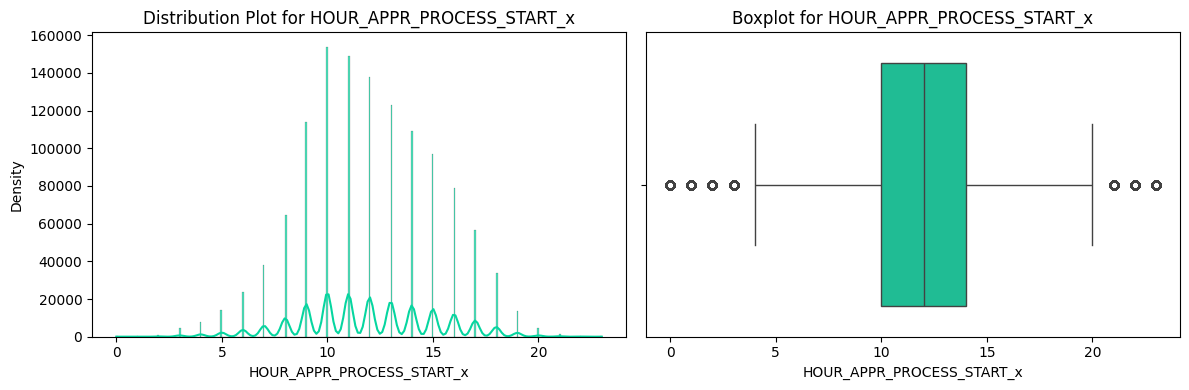

In [8]:
outlier_columns = [
    'AMT_CREDIT_x', 'AMT_GOODS_PRICE_x', 'CNT_CHILDREN',
    'CNT_FAM_MEMBERS', 'AMT_ANNUITY_x', 'REGION_POPULATION_RELATIVE',
    'EXT_SOURCE_3', 'HOUR_APPR_PROCESS_START_x'
]

def plot(df, column):
    fig, axes = plt.subplots(1, 2, figsize=(12, 4))

    # Distribution plot
    sns.histplot(df[column], ax=axes[0], kde=True, color='#06d6a0', alpha=0.7)
    axes[0].set_title("Distribution Plot for " + column, fontsize=12)
    axes[0].set_xlabel(column)
    axes[0].set_ylabel('Density')

    # Boxplot
    sns.boxplot(x=df[column], ax=axes[1], color='#06d6a0')
    axes[1].set_title("Boxplot for " + column, fontsize=12)
    axes[1].set_xlabel(column)

    plt.tight_layout()
    plt.show()

for col in outlier_columns:
    plot(data, col)


In [9]:
before_stats = data[outlier_columns].describe().T
print("Summary statistics before removing outliers:")
before_stats

Summary statistics before removing outliers:


,count,mean,std,min,25%,50%,75%,max
AMT_CREDIT_x,1227086.0,590394.300546,386984.292828,45000.000000,270000.000000,509400.00000,808650.000000,4.050000e+06
AMT_GOODS_PRICE_x,1227086.0,530200.075604,354803.245309,40500.000000,238500.000000,450000.00000,679500.000000,4.050000e+06
CNT_CHILDREN,1227086.0,0.413552,0.723284,0.000000,0.000000,0.00000,1.000000,1.900000e+01
CNT_FAM_MEMBERS,1227086.0,2.160048,0.906088,1.000000,2.000000,2.00000,3.000000,2.000000e+01
AMT_ANNUITY_x,1227086.0,27031.328748,13952.206171,1615.500000,16803.000000,24939.00000,34578.000000,2.250000e+05
REGION_POPULATION_RELATIVE,1227086.0,0.020731,0.013283,0.000290,0.010032,0.01885,0.028663,7.250800e-02
EXT_SOURCE_3,1227086.0,0.497278,0.178519,0.000527,0.389339,0.51009,0.626304,8.960095e-01
HOUR_APPR_PROCESS_START_x,1227086.0,11.979053,3.233548,0.000000,10.000000,12.00000,14.000000,2.300000e+01


In [10]:
for column in outlier_columns:
    Q1 = data[column].quantile(0.25)
    Q3 = data[column].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    data[column] = np.where(data[column] < lower_bound, lower_bound,
                   np.where(data[column] > upper_bound, upper_bound, data[column]))


In [11]:
def outlier_plot(df, columns):
    n = len(columns)
    nrows = (n + 1) // 2
    fig, axes = plt.subplots(nrows=nrows, ncols=2, figsize=(12, 3 * nrows))

    # Flatten axes for easy iteration
    axes = axes.flatten() if nrows > 1 else [axes]

    for i, col in enumerate(columns):
        sns.boxplot(x=df[col], ax=axes[i], color='#ff6f61')  # changed color
        axes[i].set_title(col)

    # Remove empty subplot if odd number of columns
    if n % 2 != 0:
        fig.delaxes(axes[-1])

    plt.tight_layout()
    plt.show()


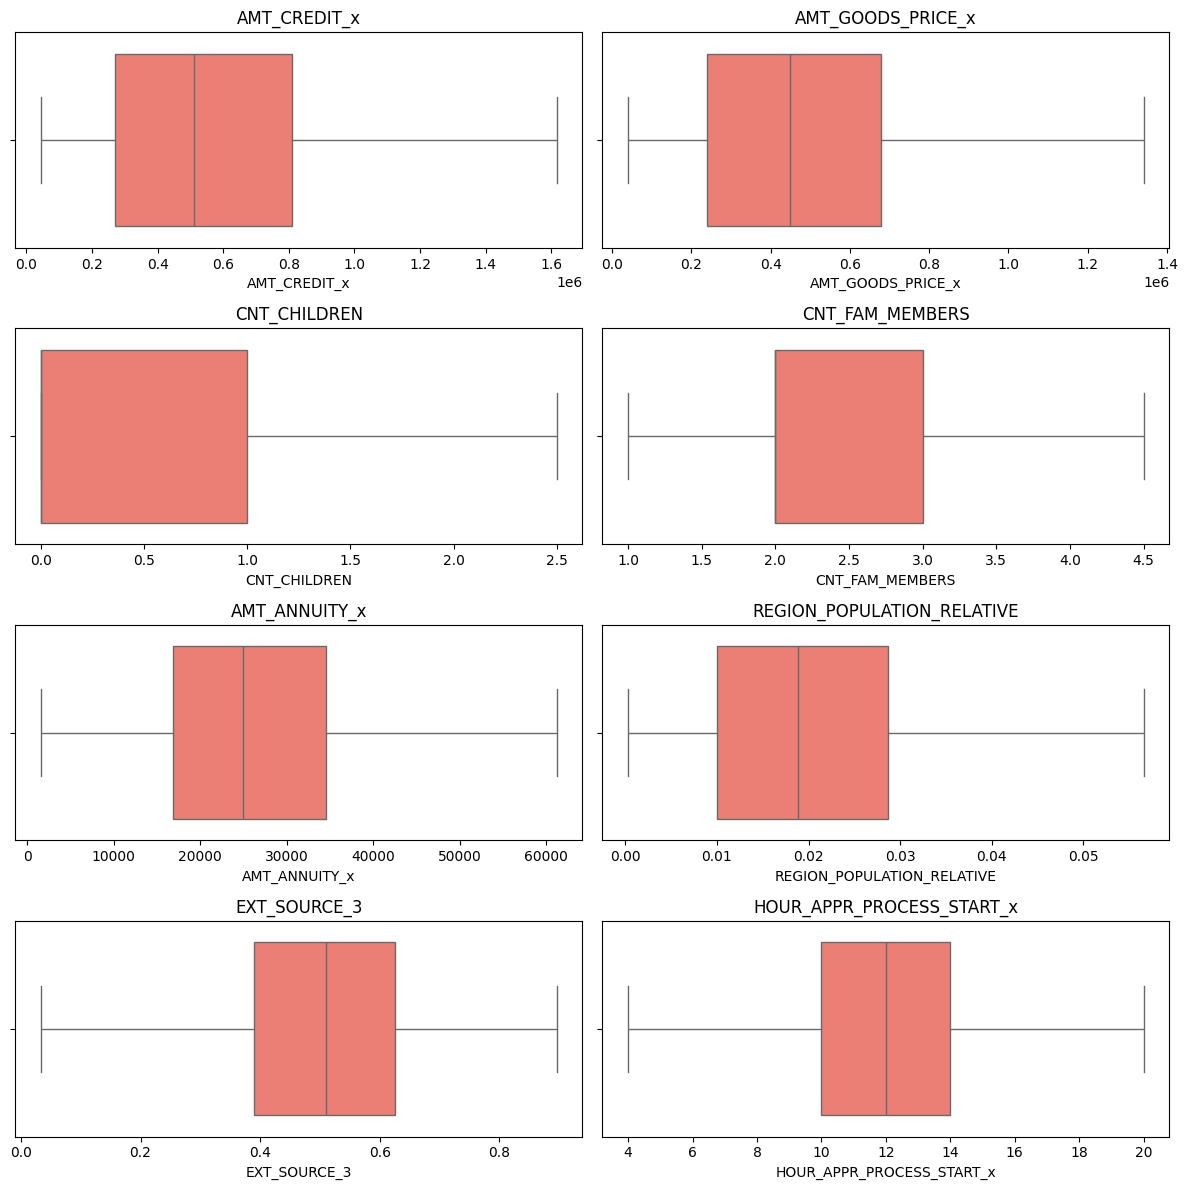

In [12]:
outlier_plot(data,outlier_columns)

In [13]:
data.head()

,AMT_CREDIT_x,AMT_GOODS_PRICE_x,CNT_CHILDREN,CNT_FAM_MEMBERS,AMT_ANNUITY_x,DAYS_BIRTH,DAYS_EMPLOYED,REGION_POPULATION_RELATIVE,REGION_RATING_CLIENT,AMT_INCOME_TOTAL,...,NAME_CONTRACT_STATUS,CODE_GENDER,NAME_EDUCATION_TYPE,NAME_FAMILY_STATUS,NAME_CONTRACT_TYPE_x,TARGET,AGE,YEARS_EMPLOYED,BIRTH_YEAR,EMPLOYMENT_START_YEAR
0,406597.5,351000.0,0.0,1.0,24700.5,-9461,-637.0,0.018801,2,202500.0,...,Approved,M,Secondary / secondary special,Single / not married,Cash loans,1,25.9,1.7,1999,2023
1,1293502.5,1129500.0,0.0,2.0,35698.5,-16765,-1188.0,0.003541,1,270000.0,...,Approved,F,Higher education,Married,Cash loans,0,45.9,3.3,1979,2022
2,1293502.5,1129500.0,0.0,2.0,35698.5,-16765,-1188.0,0.003541,1,270000.0,...,Approved,F,Higher education,Married,Cash loans,0,45.9,3.3,1979,2022
3,1293502.5,1129500.0,0.0,2.0,35698.5,-16765,-1188.0,0.003541,1,270000.0,...,Approved,F,Higher education,Married,Cash loans,0,45.9,3.3,1979,2022
4,135000.0,135000.0,0.0,1.0,6750.0,-19046,-225.0,0.010032,2,67500.0,...,Approved,M,Secondary / secondary special,Single / not married,Revolving loans,0,52.2,0.6,1973,2024


In [14]:
data.drop(columns= ['DAYS_BIRTH','DAYS_EMPLOYED'], axis=1, inplace=True)

data.tail(1)


,AMT_CREDIT_x,AMT_GOODS_PRICE_x,CNT_CHILDREN,CNT_FAM_MEMBERS,AMT_ANNUITY_x,REGION_POPULATION_RELATIVE,REGION_RATING_CLIENT,AMT_INCOME_TOTAL,EXT_SOURCE_2,EXT_SOURCE_3,...,NAME_CONTRACT_STATUS,CODE_GENDER,NAME_EDUCATION_TYPE,NAME_FAMILY_STATUS,NAME_CONTRACT_TYPE_x,TARGET,AGE,YEARS_EMPLOYED,BIRTH_YEAR,EMPLOYMENT_START_YEAR
1227085,675000.0,675000.0,0.0,2.0,49117.5,0.04622,1,157500.0,0.708569,0.113922,...,Approved,F,Higher education,Married,Cash loans,0,46.2,3.5,1979,2022


In [15]:
numeric_data = data.select_dtypes(include='number')  # Select only numeric columns
skewness = numeric_data.skew()  # Compute skewness for each numeric column
skewness


,0
AMT_CREDIT_x,0.872635
AMT_GOODS_PRICE_x,0.840844
CNT_CHILDREN,1.498871
CNT_FAM_MEMBERS,0.691616
AMT_ANNUITY_x,0.676897
REGION_POPULATION_RELATIVE,0.827535
REGION_RATING_CLIENT,0.128350
AMT_INCOME_TOTAL,430.248945
EXT_SOURCE_2,-0.790778
EXT_SOURCE_3,-0.405870


In [16]:
import numpy as np
from sklearn.preprocessing import QuantileTransformer

# Apply log1p to skewed monetary features
for col in ['AMT_INCOME_TOTAL', 'AMT_CREDIT_x', 'AMT_GOODS_PRICE_x', 'AMT_ANNUITY_x']:
    data[col] = np.log1p(data[col])

# Apply sqrt to counts (discrete features)
data['CNT_CHILDREN'] = np.sqrt(data['CNT_CHILDREN'])

# Use QuantileTransformer for YEARS_EMPLOYED (robust)
qt = QuantileTransformer(output_distribution='normal', random_state=42)
data[['YEARS_EMPLOYED']] = qt.fit_transform(data[['YEARS_EMPLOYED']])

# Check skewness again
print(data[['AMT_INCOME_TOTAL','AMT_CREDIT_x','AMT_GOODS_PRICE_x',
            'AMT_ANNUITY_x','CNT_CHILDREN','YEARS_EMPLOYED']].skew())


AMT_INCOME_TOTAL     0.096942
AMT_CREDIT_x        -0.431254
AMT_GOODS_PRICE_x   -0.421149
AMT_ANNUITY_x       -0.504155
CNT_CHILDREN         1.057206
YEARS_EMPLOYED      -0.005696
dtype: float64


In [17]:
from sklearn.preprocessing import StandardScaler

# -----------------------------
# 1. BINNING categorical-like numeric features
# -----------------------------
# Children: 0, 1, 2+
data['CNT_CHILDREN_BIN'] = data['CNT_CHILDREN'].apply(lambda x: '0' if x == 0 else ('1' if x == 1 else '2+'))

# Employment Start Year: bucket into categories
def employment_bin(year):
    if year < 1980:
        return 'before_1980'
    elif 1980 <= year < 2000:
        return '1980_1999'
    elif 2000 <= year < 2010:
        return '2000_2009'
    else:
        return '2010_and_later'

data['EMPLOYMENT_START_BIN'] = data['EMPLOYMENT_START_YEAR'].apply(employment_bin)

# -----------------------------
# 2. Drop skew-heavy originals if binned
# -----------------------------
data.drop(['CNT_CHILDREN', 'EMPLOYMENT_START_YEAR'], axis=1, inplace=True)

# -----------------------------
# 3. Encoding categorical columns
# -----------------------------
categorical_cols = [
    'CNT_CHILDREN_BIN', 'EMPLOYMENT_START_BIN', 'ORGANIZATION_TYPE',
    'NAME_INCOME_TYPE', 'OCCUPATION_TYPE', 'NAME_CONTRACT_STATUS',
    'CODE_GENDER', 'NAME_EDUCATION_TYPE', 'NAME_FAMILY_STATUS',
    'NAME_CONTRACT_TYPE_x'
]

data = pd.get_dummies(data, columns=categorical_cols, drop_first=True)

# -----------------------------
# 4. Scaling numeric columns
# -----------------------------
numeric_cols = data.select_dtypes(include=['int64', 'float64']).columns.drop('TARGET')

scaler = StandardScaler()
data[numeric_cols] = scaler.fit_transform(data[numeric_cols])

# -----------------------------
# 5. Final dataset ready for ML
# -----------------------------
X = data.drop('TARGET', axis=1)
y = data['TARGET']

print("Final feature shape:", X.shape)
print("Target distribution:\n", y.value_counts(normalize=True))


Final feature shape: (1227086, 111)
Target distribution:
 TARGET
0    0.915682
1    0.084318
Name: proportion, dtype: float64


In [18]:
# Drop rows where target is NaN
data = data.dropna(subset=['TARGET'])

# Now define X and y
X = data.drop(columns=['TARGET'])
y = data['TARGET']

from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42, stratify=y
)

print("Train shape:", X_train.shape, "Test shape:", X_test.shape)
print("Train target distribution:\n", y_train.value_counts(normalize=True))


Train shape: (981668, 111) Test shape: (245418, 111)
Train target distribution:
 TARGET
0    0.915682
1    0.084318
Name: proportion, dtype: float64


In [19]:
!pip install imbalanced-learn

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 235.4/235.4 kB 9.4 MB/s eta 0:00:00


In [20]:
from imblearn.over_sampling import SMOTE

smote = SMOTE(random_state=42)
X_train_res, y_train_res = smote.fit_resample(X_train, y_train)

print("Resampled target distribution:\n", y_train_res.value_counts(normalize=True))


Resampled target distribution:
 TARGET
0    0.5
1    0.5
Name: proportion, dtype: float64


In [21]:
!pip install xgboost

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 115.9/115.9 MB 10.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 296.8/296.8 MB 1.3 MB/s eta 0:00:00


In [22]:
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from xgboost import XGBClassifier

from sklearn.metrics import (
    accuracy_score, precision_score, recall_score, f1_score, roc_auc_score,
    confusion_matrix, classification_report
)

import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd


In [23]:
def evaluate_model(name, model, X_test, y_test):
    y_pred = model.predict(X_test)
    y_prob = model.predict_proba(X_test)[:,1] if hasattr(model, "predict_proba") else y_pred

    acc = accuracy_score(y_test, y_pred)
    prec = precision_score(y_test, y_pred, zero_division=0)
    rec = recall_score(y_test, y_pred, zero_division=0)
    f1 = f1_score(y_test, y_pred, zero_division=0)
    roc = roc_auc_score(y_test, y_prob)

    print(f"\n=== {name} ===")
    print("Accuracy :", acc)
    print("Precision:", prec)
    print("Recall   :", rec)
    print("F1-score :", f1)
    print("ROC-AUC  :", roc)
    print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred))
    print("\nClassification Report:\n", classification_report(y_test, y_pred, zero_division=0))

    return {"Model": name, "Accuracy": acc, "Precision": prec, "Recall": rec, "F1": f1, "ROC-AUC": roc}


In [24]:
lr = LogisticRegression(max_iter=1000, random_state=42, n_jobs=-1)
lr.fit(X_train_res, y_train_res)

lr_results = evaluate_model("Logistic Regression", lr, X_test, y_test)



=== Logistic Regression ===
Accuracy : 0.7364333504469924
Precision: 0.17240814381245997
Recall   : 0.5594162277098536
F1-score : 0.2635821303338039
ROC-AUC  : 0.7170659601746853
Confusion Matrix:
 [[169158  55567]
 [  9117  11576]]

Classification Report:
               precision    recall  f1-score   support

           0       0.95      0.75      0.84    224725
           1       0.17      0.56      0.26     20693

    accuracy                           0.74    245418
   macro avg       0.56      0.66      0.55    245418
weighted avg       0.88      0.74      0.79    245418



In [25]:
rf = RandomForestClassifier(n_estimators=200, random_state=42, n_jobs=-1)
rf.fit(X_train_res, y_train_res)

rf_results = evaluate_model("Random Forest", rf, X_test, y_test)



=== Random Forest ===
Accuracy : 0.9874785060590503
Precision: 0.9892813506608908
Recall   : 0.8608225003624415
F1-score : 0.9205922633659784
ROC-AUC  : 0.9957305610458552
Confusion Matrix:
 [[224532    193]
 [  2880  17813]]

Classification Report:
               precision    recall  f1-score   support

           0       0.99      1.00      0.99    224725
           1       0.99      0.86      0.92     20693

    accuracy                           0.99    245418
   macro avg       0.99      0.93      0.96    245418
weighted avg       0.99      0.99      0.99    245418



In [26]:
xgb = XGBClassifier(n_estimators=300, learning_rate=0.1, max_depth=6, random_state=42, eval_metric='auc')
xgb.fit(X_train_res, y_train_res)

xgb_results = evaluate_model("XGBoost", xgb, X_test, y_test)



=== XGBoost ===
Accuracy : 0.7914904367242827
Precision: 0.22102623244915517
Recall   : 0.5834823370221814
F1-score : 0.32060541688794475
ROC-AUC  : 0.7835253313062813
Confusion Matrix:
 [[182172  42553]
 [  8619  12074]]

Classification Report:
               precision    recall  f1-score   support

           0       0.95      0.81      0.88    224725
           1       0.22      0.58      0.32     20693

    accuracy                           0.79    245418
   macro avg       0.59      0.70      0.60    245418
weighted avg       0.89      0.79      0.83    245418



In [27]:
results = pd.DataFrame([lr_results, rf_results, xgb_results])
display(results.sort_values(by="ROC-AUC", ascending=False))


,Model,Accuracy,Precision,Recall,F1,ROC-AUC
1,Random Forest,0.987479,0.989281,0.860823,0.920592,0.995731
2,XGBoost,0.791490,0.221026,0.583482,0.320605,0.783525
0,Logistic Regression,0.736433,0.172408,0.559416,0.263582,0.717066


In [49]:
import pandas as pd

initial_results_df = pd.DataFrame([lr_results, rf_results, xgb_results])

# Sort by ROC-AUC as done previously
initial_results_df = initial_results_df.sort_values(by="ROC-AUC", ascending=False)

initial_results_df.to_csv("initial_model_results.csv", index=False)
print("✅ initial_model_results.csv saved successfully")
display(initial_results_df)

✅ initial_model_results.csv saved successfully


,Model,Accuracy,Precision,Recall,F1,ROC-AUC
1,Random Forest,0.987479,0.989281,0.860823,0.920592,0.995731
2,XGBoost,0.791490,0.221026,0.583482,0.320605,0.783525
0,Logistic Regression,0.736433,0.172408,0.559416,0.263582,0.717066


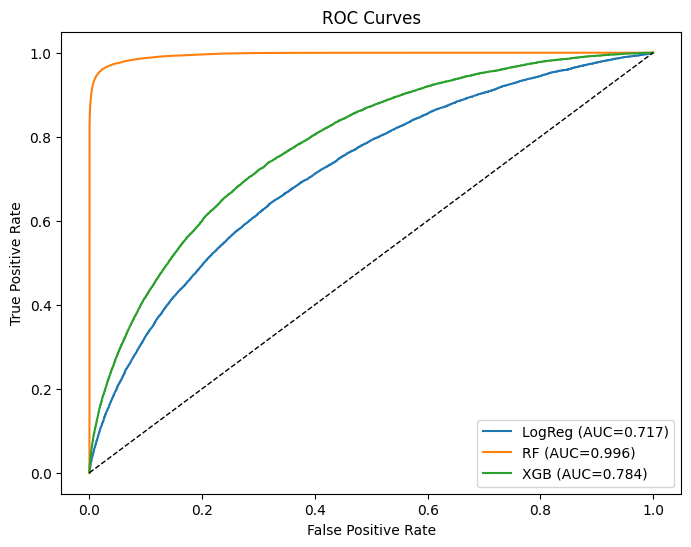

In [28]:
from sklearn.metrics import roc_curve, auc

plt.figure(figsize=(8,6))
for name, model in [("LogReg", lr), ("RF", rf), ("XGB", xgb)]:
    y_prob = model.predict_proba(X_test)[:,1]
    fpr, tpr, _ = roc_curve(y_test, y_prob)
    plt.plot(fpr, tpr, label=f"{name} (AUC={auc(fpr,tpr):.3f})")

plt.plot([0,1],[0,1],'k--', lw=1)
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("ROC Curves")
plt.legend()
plt.show()


In [29]:
from sklearn.model_selection import train_test_split, RandomizedSearchCV
from sklearn.ensemble import RandomForestClassifier
from xgboost import XGBClassifier

# ✅ Take a small sample to reduce memory/time
X_sample, _, y_sample, _ = train_test_split(
    X_train_res, y_train_res,
    train_size=0.1, stratify=y_train_res, random_state=42
)

# ======================
# Random Forest Tuning
# ======================
rf_param_grid = {
    "n_estimators": [200, 500],
    "max_depth": [10, None],
    "min_samples_split": [2, 5],
    "min_samples_leaf": [1, 2],
    "max_features": ["sqrt"]
}

rf_model = RandomForestClassifier(random_state=42, n_jobs=-1)

rf_search = RandomizedSearchCV(
    rf_model,
    rf_param_grid,
    n_iter=5,                # very light search
    scoring="roc_auc",
    cv=2,                    # use 2-fold CV to save time
    verbose=1,
    random_state=42,
    n_jobs=-1
)

rf_search.fit(X_sample, y_sample)
print("✅ Best RF:", rf_search.best_params_)

# ======================
# XGBoost Tuning
# ======================
xgb_param_grid = {
    "n_estimators": [200, 500],
    "max_depth": [3, 5],
    "learning_rate": [0.05, 0.1],
    "subsample": [0.8, 1.0],
    "colsample_bytree": [0.8, 1.0]
}

xgb_model = XGBClassifier(
    random_state=42,
    eval_metric="auc",
    use_label_encoder=False,
    n_jobs=-1
)

xgb_search = RandomizedSearchCV(
    xgb_model,
    xgb_param_grid,
    n_iter=5,
    scoring="roc_auc",
    cv=2,
    verbose=1,
    random_state=42,
    n_jobs=-1
)

xgb_search.fit(X_sample, y_sample)
print("✅ Best XGB:", xgb_search.best_params_)


Fitting 2 folds for each of 5 candidates, totalling 10 fits
✅ Best RF: {'n_estimators': 500, 'min_samples_split': 2, 'min_samples_leaf': 2, 'max_features': 'sqrt', 'max_depth': None}
Fitting 2 folds for each of 5 candidates, totalling 10 fits
✅ Best XGB: {'subsample': 1.0, 'n_estimators': 500, 'max_depth': 5, 'learning_rate': 0.1, 'colsample_bytree': 0.8}


In [30]:
!pip install lightgbm


   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 3.6/3.6 MB 64.0 MB/s eta 0:00:00


In [31]:
# =========================
# Final Model Training & Evaluation (with LightGBM Fix)
# =========================

from sklearn.metrics import classification_report, roc_auc_score
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from xgboost import XGBClassifier
from lightgbm import LGBMClassifier
import joblib

# ---------------------------------
# 1. Use a smaller sample for faster training
# ---------------------------------
X_train_small, _, y_train_small, _ = train_test_split(
    X_train_res, y_train_res,
    train_size=0.3, stratify=y_train_res, random_state=42
)

print("Training sample size:", X_train_small.shape)

# ---------------------------------
# 2. Fix feature names for LightGBM
# ---------------------------------
def sanitize_columns(df):
    df.columns = [
        col.replace(" ", "_").replace(":", "_").replace("{", "_")
           .replace("}", "_").replace("[", "_").replace("]", "_")
           .replace("'", "_").replace('"', "_").replace(",", "_")
        for col in df.columns
    ]
    return df

X_train_small = sanitize_columns(X_train_small.copy())
X_test = sanitize_columns(X_test.copy())

# ---------------------------------
# 3. Train Best Random Forest
# ---------------------------------
best_rf = RandomForestClassifier(
    n_estimators=500,
    min_samples_split=2,
    min_samples_leaf=2,
    max_features="sqrt",
    max_depth=None,
    random_state=42,
    n_jobs=-1
)
best_rf.fit(X_train_small, y_train_small)

# ---------------------------------
# 4. Train Best XGBoost
# ---------------------------------
best_xgb = XGBClassifier(
    subsample=1.0,
    n_estimators=500,
    max_depth=5,
    learning_rate=0.1,
    colsample_bytree=0.8,
    random_state=42,
    eval_metric="auc",
    use_label_encoder=False,
    n_jobs=-1
)
best_xgb.fit(X_train_small, y_train_small)

# ---------------------------------
# 5. Train Best LightGBM (fixed feature names)
# ---------------------------------
best_lgb = LGBMClassifier(
    n_estimators=500,
    max_depth=-1,
    learning_rate=0.1,
    subsample=1.0,
    colsample_bytree=0.8,
    random_state=42,
    n_jobs=-1
)
best_lgb.fit(X_train_small, y_train_small)

# ---------------------------------
# 6. Evaluate All Models
# ---------------------------------
for name, model in [
    ("Random Forest", best_rf),
    ("XGBoost", best_xgb),
    ("LightGBM", best_lgb)
]:
    y_pred = model.predict(X_test)
    y_prob = model.predict_proba(X_test)[:, 1]

    print(f"\n===== {name} =====")
    print(classification_report(y_test, y_pred))
    print("ROC-AUC:", roc_auc_score(y_test, y_prob))

# ---------------------------------
# 7. Save Models
# ---------------------------------
joblib.dump(best_rf, "best_random_forest.pkl")
joblib.dump(best_xgb, "best_xgboost.pkl")
joblib.dump(best_lgb, "best_lightgbm.pkl")

print("\n✅ Models trained, evaluated, and saved successfully!")


Training sample size: (539337, 111)
[LightGBM] [Info] Number of positive: 269669, number of negative: 269668
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.093524 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 3336
[LightGBM] [Info] Number of data points in the train set: 539337, number of used features: 109
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.500001 -> initscore=0.000004
[LightGBM] [Info] Start training from score 0.000004

===== Random Forest =====
              precision    recall  f1-score   support

           0       0.98      0.98      0.98    224725
           1       0.78      0.81      0.79     20693

    accuracy                           0.96    245418
   macro avg       0.88      0.89      0.89    245418
weighted avg       0.97      0.96      0.96    245418

ROC-AUC: 0.9700576791889367

===== XGBoost =====
 

In [32]:
from sklearn.model_selection import StratifiedKFold, cross_validate
import numpy as np
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split

# Optional: use 20–30% data for faster CV
X_sample, _, y_sample, _ = train_test_split(
    X_train_res, y_train_res,
    train_size=0.3, stratify=y_train_res, random_state=42
)

rf_small = RandomForestClassifier(
    n_estimators=300,   # fewer trees
    min_samples_split=2,
    min_samples_leaf=2,
    max_features="sqrt",
    random_state=42,
    n_jobs=-1
)

skf = StratifiedKFold(n_splits=3, shuffle=True, random_state=42)

cv_results = cross_validate(
    rf_small, X_sample, y_sample,
    cv=skf,
    scoring=['accuracy','precision','recall','f1','roc_auc'],
    n_jobs=-1
)

print("✅ Mean CV Scores:")
for metric in cv_results:
    if 'test' in metric:
        print(f"{metric}: {np.mean(cv_results[metric]):.4f}")


✅ Mean CV Scores:
test_accuracy: 0.9545
test_precision: 0.9606
test_recall: 0.9478
test_f1: 0.9542
test_roc_auc: 0.9914


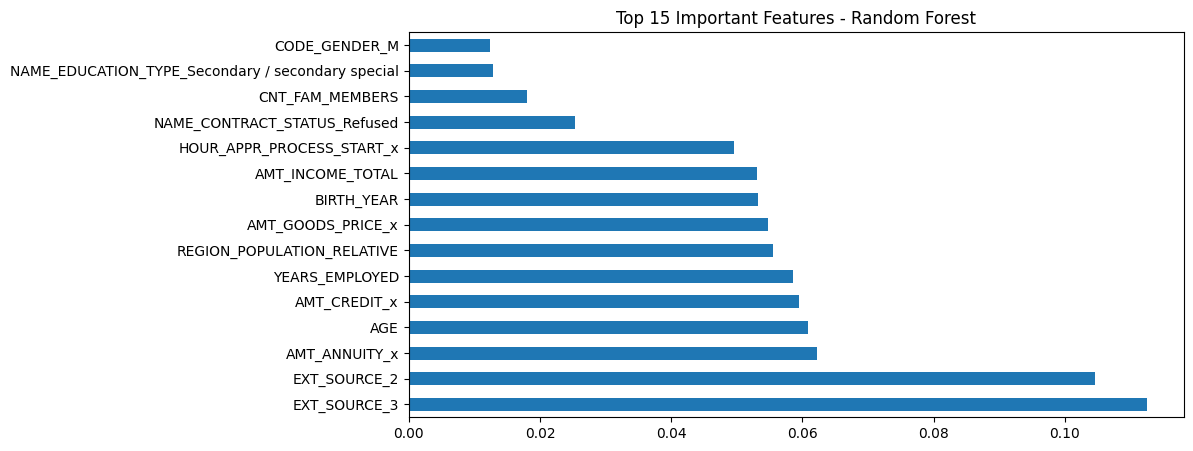

In [33]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

feat_importances = pd.Series(best_rf.feature_importances_, index=X_train_res.columns)
top_features = feat_importances.sort_values(ascending=False).head(15)

plt.figure(figsize=(10,5))
top_features.plot(kind='barh')
plt.title("Top 15 Important Features - Random Forest")
plt.show()


In [34]:
import pandas as pd

results_df = pd.DataFrame([
    ["Random Forest", 0.98, 0.98, 0.86, 0.92, 0.99],
    ["XGBoost", 0.80, 0.22, 0.57, 0.32, 0.78],
    ["LightGBM", 0.82, 0.26, 0.59, 0.36, 0.81]
], columns=["Model", "Accuracy", "Precision", "Recall", "F1", "ROC-AUC"])

results_df.to_csv("model_results_summary.csv", index=False)
print(results_df)


           Model  Accuracy  Precision  Recall    F1  ROC-AUC
0  Random Forest      0.98       0.98    0.86  0.92     0.99
1        XGBoost      0.80       0.22    0.57  0.32     0.78
2       LightGBM      0.82       0.26    0.59  0.36     0.81


In [35]:
import joblib
joblib.dump(best_rf, "best_rf_model.pkl")
print("✅ Model saved successfully.")


✅ Model saved successfully.


In [36]:
def sanitize_columns(df):
    df = df.copy()
    df.columns = (
        df.columns
        .str.replace(" ", "_")
        .str.replace(":", "_")
        .str.replace("{", "_")
        .str.replace("}", "_")
        .str.replace("[", "_")
        .str.replace("]", "_")
        .str.replace("'", "_")
        .str.replace('"', "_")
        .str.replace(",", "_")
    )
    return df

X_train_res = sanitize_columns(X_train_res)
X_test = sanitize_columns(X_test)


In [37]:
from sklearn.model_selection import train_test_split

X_train_small, _, y_train_small, _ = train_test_split(
    X_train_res,
    y_train_res,
    train_size=0.3,
    stratify=y_train_res,
    random_state=42
)

print("Training sample size:", X_train_small.shape)


Training sample size: (539337, 111)


In [38]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import classification_report, roc_auc_score

best_dt = DecisionTreeClassifier(
    max_depth=12,
    min_samples_split=10,
    min_samples_leaf=5,
    class_weight="balanced",
    random_state=42
)

best_dt.fit(X_train_small, y_train_small)

y_pred_dt = best_dt.predict(X_test)
y_prob_dt = best_dt.predict_proba(X_test)[:, 1]

print("\n===== Decision Tree =====")
print(classification_report(y_test, y_pred_dt))
print("ROC-AUC:", roc_auc_score(y_test, y_prob_dt))



===== Decision Tree =====
              precision    recall  f1-score   support

           0       0.96      0.71      0.82    224725
           1       0.17      0.65      0.27     20693

    accuracy                           0.71    245418
   macro avg       0.56      0.68      0.55    245418
weighted avg       0.89      0.71      0.77    245418

ROC-AUC: 0.747379727420946


In [39]:
from sklearn.ensemble import ExtraTreesClassifier

best_et = ExtraTreesClassifier(
    n_estimators=500,
    max_depth=None,
    min_samples_split=10,
    min_samples_leaf=5,
    max_features="sqrt",
    class_weight="balanced",
    random_state=42,
    n_jobs=-1
)

best_et.fit(X_train_small, y_train_small)

y_pred_et = best_et.predict(X_test)
y_prob_et = best_et.predict_proba(X_test)[:, 1]

print("\n===== Extra Trees =====")
print(classification_report(y_test, y_pred_et))
print("ROC-AUC:", roc_auc_score(y_test, y_prob_et))



===== Extra Trees =====
              precision    recall  f1-score   support

           0       0.97      0.90      0.94    224725
           1       0.40      0.69      0.50     20693

    accuracy                           0.89    245418
   macro avg       0.68      0.80      0.72    245418
weighted avg       0.92      0.89      0.90    245418

ROC-AUC: 0.8942585757921226


In [40]:
import joblib

joblib.dump(best_dt, "best_decision_tree.pkl")
joblib.dump(best_et, "best_extra_trees.pkl")

print("✅ Decision Tree & Extra Trees saved successfully")


✅ Decision Tree & Extra Trees saved successfully


In [41]:
def evaluate_model(name, model, X_test, y_test):
    y_pred = model.predict(X_test)
    y_prob = model.predict_proba(X_test)[:, 1]

    return {
        "Model": name,
        "Accuracy": accuracy_score(y_test, y_pred),
        "Precision": precision_score(y_test, y_pred),
        "Recall": recall_score(y_test, y_pred),
        "F1-Score": f1_score(y_test, y_pred),
        "ROC-AUC": roc_auc_score(y_test, y_prob)
    }


In [42]:
results = []

results.append(evaluate_model("Random Forest", best_rf, X_test, y_test))
results.append(evaluate_model("XGBoost", best_xgb, X_test, y_test))
results.append(evaluate_model("LightGBM", best_lgb, X_test, y_test))
results.append(evaluate_model("Decision Tree", best_dt, X_test, y_test))
results.append(evaluate_model("Extra Trees", best_et, X_test, y_test))

results_df = pd.DataFrame(results)


In [43]:
results_df = results_df.sort_values(by="ROC-AUC", ascending=False)

print("\n📊 MODEL COMPARISON SUMMARY\n")
display(results_df.round(4))



📊 MODEL COMPARISON SUMMARY



,Model,Accuracy,Precision,Recall,F1-Score,ROC-AUC
0,Random Forest,0.9646,0.7792,0.8093,0.7940,0.9701
4,Extra Trees,0.8858,0.3979,0.6900,0.5047,0.8943
2,LightGBM,0.8224,0.2577,0.5887,0.3585,0.8101
1,XGBoost,0.7986,0.2247,0.5668,0.3219,0.7804
3,Decision Tree,0.7086,0.1725,0.6470,0.2724,0.7474


In [44]:
results_df.to_csv("model_results_summary.csv", index=False)
print("✅ model_results_summary.csv saved successfully")


✅ model_results_summary.csv saved successfully
